<a href="https://colab.research.google.com/github/MiladMousavi44/waveenrgyconverter_outputpower/blob/main/Copy_of_Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = pd.read_excel("/content/gdrive/MyDrive/Book11 (Autosaved).xlsx")

In [ ]:
train = df(train)

In [ ]:
df.head(train)

,Nom.,Time (s),Wind_velocity (m/s),Wave_Height(m),Power(w)
0,1,4994.786236,-0.563177,0.097674,0.000426
1,2,4995.307612,-1.371841,0.274419,0.004942
2,3,4995.828989,-2.209386,0.479070,0.018542
3,4,4996.350365,-2.440433,0.162791,0.001432
4,5,4996.871741,-0.823105,0.358140,0.009297


In [ ]:
train = train.iloc[:, 0:3]

In [ ]:
df.head(train)

,Nom.,Time (s),Wind_velocity (m/s)
0,1,4994.786236,-0.563177
1,2,4995.307612,-1.371841
2,3,4995.828989,-2.209386
3,4,4996.350365,-2.440433
4,5,4996.871741,-0.823105


In [ ]:
list(train.columns)

['Nom.', 'Time (s)', 'Wind_velocity (m/s)']

In [ ]:
train_x = train.iloc[:, 1:2]

In [ ]:
df.head(train_x)

,Time (s)
0,4994.786236
1,4995.307612
2,4995.828989
3,4996.350365
4,4996.871741


In [ ]:
train_x.columns = ['Time']

In [ ]:
train_y = train.iloc[:, 2]

In [ ]:
train_y = df(train_y)


In [ ]:
df.head(train_y)

,Wind_velocity (m/s)
0,-0.563177
1,-1.371841
2,-2.209386
3,-2.440433
4,-0.823105


In [ ]:
train_y.columns = ['Wind_velocity']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.99)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(7, 1) (7, 1)
(781, 1) (781, 1)


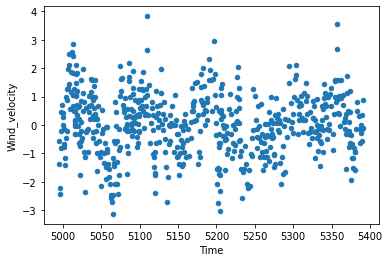

In [ ]:
data = pd.concat([train_x['Time'], train_y['Wind_velocity']], axis = 1)
data.plot.scatter(x='Time', y='Wind_velocity')


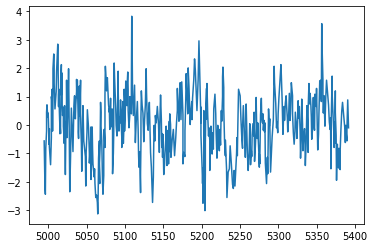

In [ ]:

plt.plot(train_x, train_y)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_excel("/content/gdrive/MyDrive/Book11 (Autosaved).xlsx.xlsx")

In [ ]:
train_x = train.iloc[:, 1:2]
train_y = train.iloc[:, 2]
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.3)

In [ ]:
list(train.columns)

['Nom.', 'Time (s)', 'Wind_velocity (m/s)', 'Wave_Height(m)', 'Power(w)']

In [ ]:
df.head(train)

,Nom.,Time (s),Wind_velocity (m/s),Wave_Height(m),Power(w)
0,1,4994.786236,-0.563177,0.097674,0.000426
1,2,4995.307612,-1.371841,0.274419,0.004942
2,3,4995.828989,-2.209386,0.479070,0.018542
3,4,4996.350365,-2.440433,0.162791,0.001432
4,5,4996.871741,-0.823105,0.358140,0.009297


In [ ]:
train['Power(w)'].describe()

count    7.870000e+02
mean     1.934271e-02
std      3.769939e-02
min      3.103774e-07
25%      6.442611e-04
50%      4.554131e-03
75%      2.029620e-02
max      3.588175e-01
Name: Power(w), dtype: float64

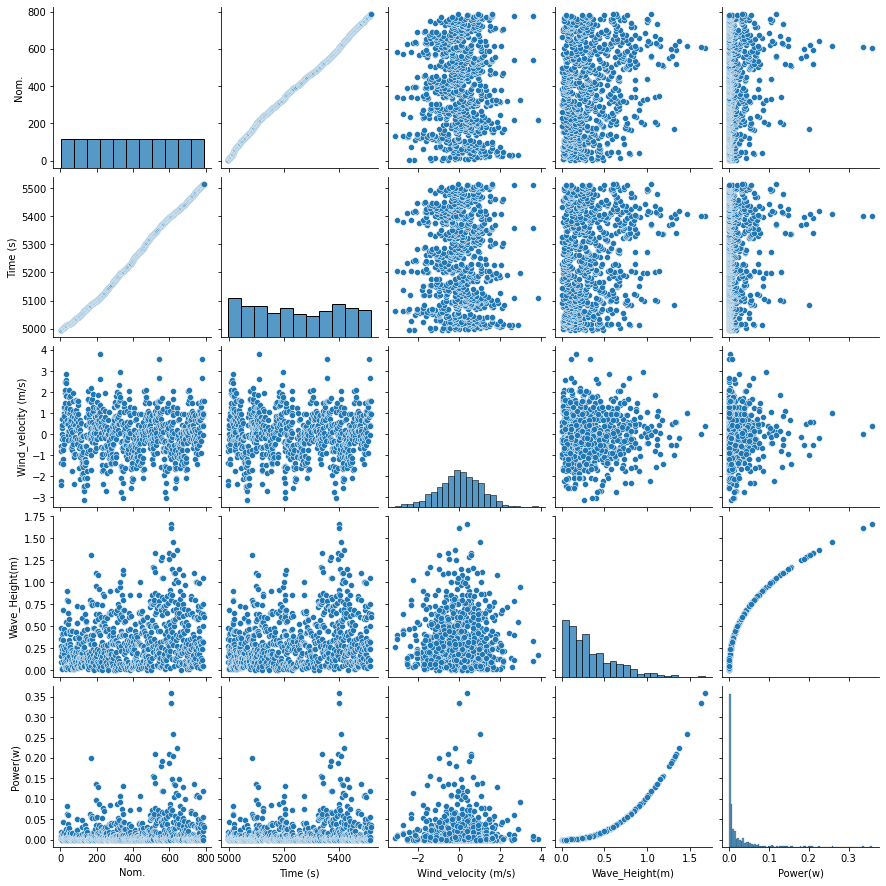

In [ ]:
sns.pairplot(train);

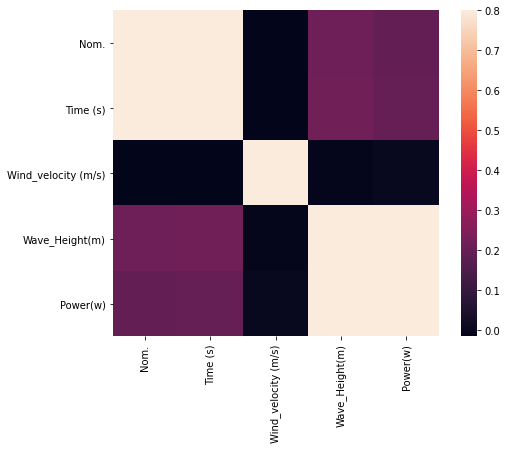

In [ ]:
#corelation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  **contour_kws,
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: The f

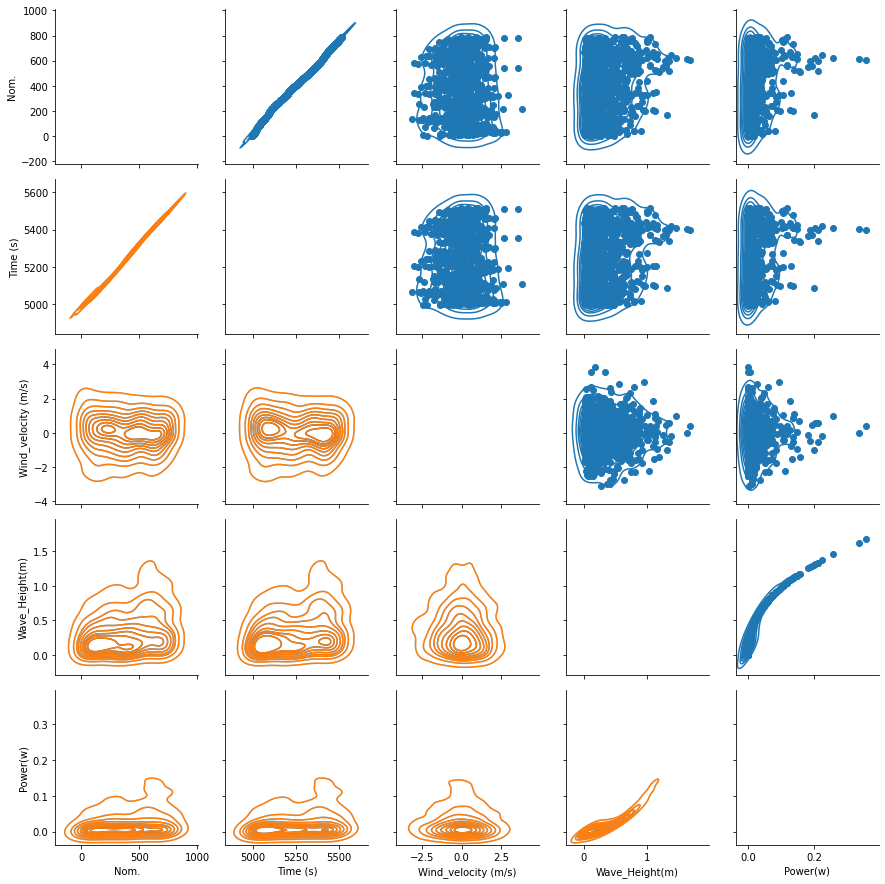

In [ ]:
g = sns.PairGrid(train)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_offdiag(sns.kdeplot, lw = 3);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


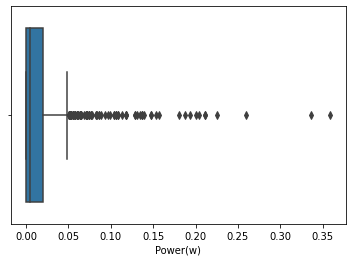

In [ ]:
sns.boxplot(train['Power(w)'])




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


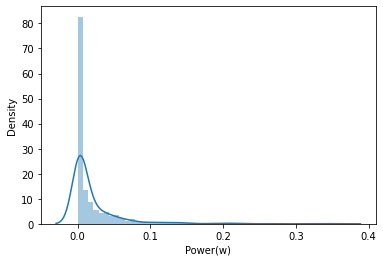

In [ ]:
sns.distplot(train['Power(w)']);


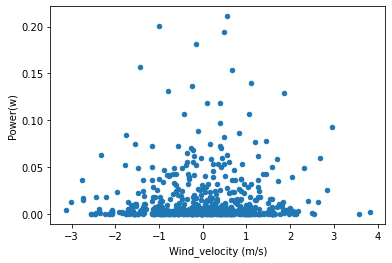

In [ ]:
data = pd.concat([train['Power(w)'], train['Wind_velocity (m/s)']], axis=1)
data.plot.scatter(x='Wind_velocity (m/s)', y='Power(w)');

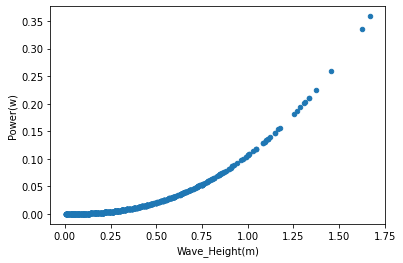

In [ ]:
data = pd.concat([train['Power(w)'], train['Wave_Height(m)']], axis=1)
data.plot.scatter(x='Wave_Height(m)', y='Power(w)');

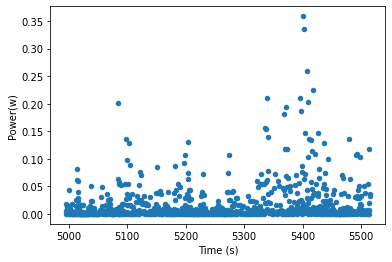

In [ ]:
data = pd.concat([train['Power(w)'], train['Time (s)']], axis=1)
data.plot.scatter(x='Time (s)', y='Power(w)');

In [ ]:
linreg = LinearRegression(normalize=True)
linreg.fit(train_x, train_y)
train_y_pred = linreg.predict(train_x)

ValueError: ignored

In [ ]:
##R2 value
linreg.score(train_x, train_y)

NotFittedError: ignored

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#training set
from sklearn.ensemble import RandomForestRegressor as rf
rfor = rf(bootstrap = True, n_estimators = 20, max_depth = 9)
rfor.fit(x_train, y_train)
pred_train_rf = rfor.predict(x_train)
np.sqrt(mean_squared_error(y_train, pred_train_rf))

ValueError: ignored

In [ ]:
#validation set
pred_val_rf = rfor.predict(x_val)
np.sqrt(mean_squared_error(y_val, pred_val_rf))

NameError: ignored